In [1]:
!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/data/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [6]:
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath = '{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, verbos = 1)

In [8]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 50, batch_size = 500, validation_split = 0.25, verbose = 0, callbacks = [checkpointer])

In [9]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.9615
Test accuracy: 0.9615384340286255


In [10]:
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split = 0.25)

Epoch 1/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.1252 - accuracy: 0.9551 - val_loss: 0.1174 - val_accuracy: 0.9623
Epoch 2/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1230 - accuracy: 0.9564 - val_loss: 0.1145 - val_accuracy: 0.9631
Epoch 3/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1223 - accuracy: 0.9584 - val_loss: 0.1184 - val_accuracy: 0.9615
Epoch 4/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1238 - accuracy: 0.9579 - val_loss: 0.1109 - val_accuracy: 0.9631
Epoch 5/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1215 - accuracy: 0.9613 - val_loss: 0.1072 - val_accuracy: 0.9646
Epoch 6/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1154 - accuracy: 0.9610 - val_loss: 0.1037 - val_accuracy: 0.9677
Epoch 7/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1150 - accuracy: 0.9623 - val_loss: 0.1016 - val_accuracy: 0.9669
Epoch 8/2000


In [11]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.125202,0.955094,0.117371,0.962308
1,0.123034,0.956377,0.114527,0.963077
2,0.122322,0.958430,0.118407,0.961538
3,0.123787,0.957916,0.110934,0.963077
4,0.121471,0.961252,0.107184,0.964615
...,...,...,...,...
1995,0.021871,0.993841,0.048992,0.986923
1996,0.022047,0.994611,0.047107,0.985385
1997,0.021309,0.994355,0.043678,0.986154
1998,0.023290,0.994355,0.043285,0.986154


In [12]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

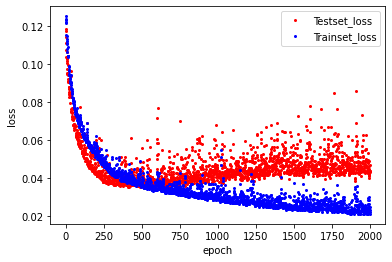

In [13]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize = 2, label = 'Testset_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize = 2, label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 20)

In [19]:
modelpath = 'Ch14-4-bestmodel.hdf5'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only=True)

In [20]:
history = model.fit(X_train, y_train, epochs = 2000, batch_size = 500, validation_split=0.25,
                    verbose = 1, callbacks = [early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 28ms/step - loss: 0.0260 - accuracy: 0.9933 - val_loss: 0.0446 - val_accuracy: 0.9854
Epoch 2/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0240 - accuracy: 0.9941 - val_loss: 0.0503 - val_accuracy: 0.9854
Epoch 3/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0214 - accuracy: 0.9944 - val_loss: 0.0460 - val_accuracy: 0.9854
Epoch 4/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0226 - accuracy: 0.9941 - val_loss: 0.0470 - val_accuracy: 0.9862
Epoch 5/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.0218 - accuracy: 0.9938 - val_loss: 0.0508 - val_accuracy: 0.9846
Epoch 6/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0229 - accuracy: 0.9936 - val_loss: 0.0457 - val_accuracy: 0.9862
Epoch 7/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0233 - accuracy: 0.9938 - val_loss: 0.0480 - val_accuracy: 0.9854
Epoch 8/2000
